In [353]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import binomial
import math
import sys
sys.setrecursionlimit(10000)

In [354]:
class Wright_Fisher():
    
    def __init__(self, Pop_size, P_A, P_B,generation, u = None, v = None):
        self.Pop_size = Pop_size
        self.P_A = P_A
        self.P_B = P_B
        self.evo_freq_A = []
        self.evo_freq_B = []
        self.evo_pop_A = []
        self.evo_pop_B = []
        self.evo_pop_size = []
        self.generation = generation
        self.u = u if u is not None else 0
        self.v = v if v is not None else 0
    
    def pop_evolution_stable(self, Pop_size, P_A, P_B, generation):
            
        if P_A > 0 and P_B > 0 and Pop_size != 0 and generation != 0:
            generation -= 1
            
            self.evo_pop_size.append(Pop_size)
            
            self.evo_freq_A.append(P_A)
            self.evo_freq_B.append(P_B)

            self.evo_pop_A.append(math.floor(P_A*Pop_size))
            self.evo_pop_B.append(math.floor(P_B*Pop_size))


            new_pop = binomial(1,P_A,Pop_size)

            new_A_ind = sum(new_pop==1)
            new_B_ind = sum(new_pop==0)

            new_P_A = new_A_ind/Pop_size
            new_P_B = new_B_ind/Pop_size

            new_pop[0:int(new_P_A*Pop_size)] = 1

            self.pop_evolution_stable(Pop_size, new_P_A, new_P_B, generation)


    def pop_evolution_dynamic(self, Pop_size, P_A, P_B, generation):
        
    
        if P_A > 0 and P_B > 0 and Pop_size != 0 and generation != 0:

            generation -= 1
            
            self.evo_pop_size.append(Pop_size)

            self.evo_freq_A.append(P_A)
            self.evo_freq_B.append(P_B)

            self.evo_pop_A.append(math.floor(P_A*Pop_size))
            self.evo_pop_B.append(math.floor(P_B*Pop_size))

            pop_evo = np.random.normal(0, 1, Pop_size)
            pop_evo_factor = sum(pop_evo)

            if Pop_size+math.floor(pop_evo_factor) >0 :

                new_pop = np.zeros(Pop_size+math.floor(pop_evo_factor))

                new_pop_size = len(new_pop)
                
                Pop_size = new_pop_size

                new_pop = binomial(1,P_A, Pop_size)

                new_A_ind = sum(new_pop==1)
                new_B_ind = sum(new_pop==0)

                new_P_A = new_A_ind/Pop_size
                new_P_B = new_B_ind/Pop_size
                
                new_pop[0:int(new_P_A*Pop_size)] = 1

                self.pop_evolution_dynamic(new_pop_size, new_P_A, new_P_B, generation)
    
    def pop_evolution_stable_mutation(self, Pop_size, P_A, P_B, u, v, generation):
    
        if P_A > 0 and P_B > 0 and Pop_size > 0 and generation != 0:
            
            generation -= 1
            
            self.evo_pop_size.append(Pop_size)

            self.evo_freq_A.append(P_A)
            self.evo_freq_B.append(P_B)

            self.evo_pop_A.append(math.floor(P_A*Pop_size))
            self.evo_pop_B.append(math.floor(P_B*Pop_size))

            new_pop = binomial(1,P_A,Pop_size)

            new_A_ind = sum(new_pop==1)
            new_B_ind = sum(new_pop==0)

            mutated_A_ind_to_B = new_A_ind * u
            mutated_B_ind_to_A = new_B_ind * v

            new_P_A = (new_A_ind-mutated_A_ind_to_B +mutated_B_ind_to_A)/Pop_size
            new_P_B = (new_B_ind-mutated_B_ind_to_A+mutated_A_ind_to_B)/Pop_size

            new_pop[0:int(new_P_A*Pop_size)] = 1

            self.pop_evolution_stable_mutation(Pop_size, new_P_A, new_P_B, u, v, generation)

    
    def pop_evolution_dynamic_mutation(self, Pop_size, P_A, P_B, u, v,generation):
    
        if P_A > 0 and P_B > 0 and Pop_size != 0 and generation != 0:
            
            generation -= 1
            self.evo_pop_size.append(Pop_size)

            self.evo_freq_A.append(P_A)
            self.evo_freq_B.append(P_B)

            self.evo_pop_A.append(math.floor(P_A*Pop_size))
            self.evo_pop_B.append(math.floor(P_B*Pop_size))

            pop_evo = np.random.normal(0, 1, Pop_size)
            pop_evo_factor = sum(pop_evo)

            if Pop_size+math.floor(pop_evo_factor) >0 :

                new_pop = np.zeros(Pop_size+math.floor(pop_evo_factor))

                new_pop_size = len(new_pop)
                
                Pop_size = new_pop_size

                new_pop = binomial(1,P_A, Pop_size)

                new_A_ind = sum(new_pop==1)
                new_B_ind = sum(new_pop==0)

                mutated_A_ind_to_B = new_A_ind * u
                mutated_B_ind_to_A = new_B_ind * v

                new_P_A = (new_A_ind-mutated_A_ind_to_B +mutated_B_ind_to_A)/Pop_size
                new_P_B = (new_B_ind-mutated_B_ind_to_A+mutated_A_ind_to_B)/Pop_size
                
                new_pop[0:int(new_P_A*self.Pop_size)] = 1

                self.pop_evolution_dynamic_mutation(new_pop_size, new_P_A, new_P_B, u, v, generation)
            

    def plot_all_pop(self):
        
        plt.plot(self.evo_pop_A, label = 'Pop A')
        plt.plot(self.evo_pop_B, label = 'Pop B')
        plt.plot(self.evo_pop_size, label = 'Tot pop')
        plt.legend()
        plt.title("Population evolution of A and B with allele frequency of A: "+str(self.P_A)+" and mutations u: "+str(self.u)+" , v: "+str(self.v))
        plt.xlabel("Number of generations")
        plt.ylabel("Population size")
        
    def plot_alleles_A_pop(self):
        
        plt.plot(self.evo_pop_A, label = 'Pop A')
        plt.legend()
        plt.title("Population evolution of A")
        plt.xlabel("Number of generations")
        plt.ylabel("Population size")
        
    def plot_alleles_B_pop(self):
        
        plt.plot(self.evo_pop_B, label = 'Pop B')
        plt.legend()
        plt.title("Population evolution of B")
        plt.xlabel("Number of generations")
        plt.ylabel("Population size")
        
    def plot_all_freq(self):

        plt.plot(self.evo_freq_A, label = 'Pop A')
        plt.plot(self.evo_freq_B, label = 'Pop B')
        plt.legend()
        plt.title("Frequency evolution of A and B with allele frequency of A: "+str(self.P_A)+" and mutations u: "+str(self.u)+" , v: "+str(self.v))
        plt.xlabel("Number of generations")
        plt.ylabel("Frequency")
        
    def plot_alleles_A_freq(self):
        
        plt.plot(self.evo_freq_A, label = 'Pop A')
        plt.legend()
        plt.title("Frequency evolution of A")
        plt.xlabel("Number of generations")
        plt.ylabel("Frequency size")
        
    def plot_alleles_B_freq(self):
        
        plt.plot(self.evo_freq_B, label = 'Pop B')
        plt.legend()
        plt.title("Frequency evolution of B")
        plt.xlabel("Number of generations")
        plt.ylabel("Frequency size")

<hr>

<h2>Stable 

In [355]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.2 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

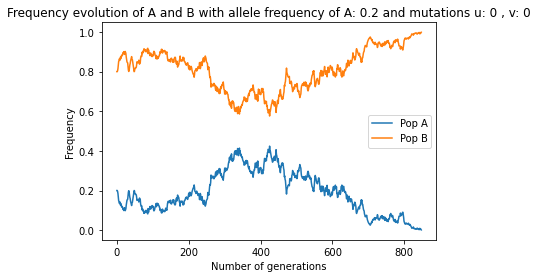

In [356]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
trial.pop_evolution_stable(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
trial.plot_all_freq()

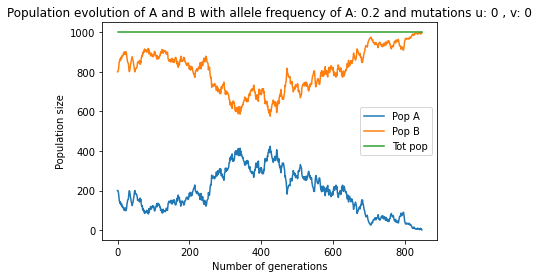

In [357]:
trial.plot_all_pop()

In [358]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.4 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

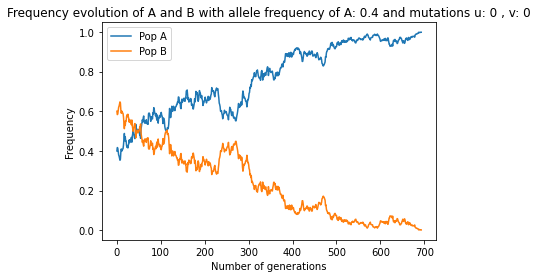

In [359]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
trial.pop_evolution_stable(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
trial.plot_all_freq()

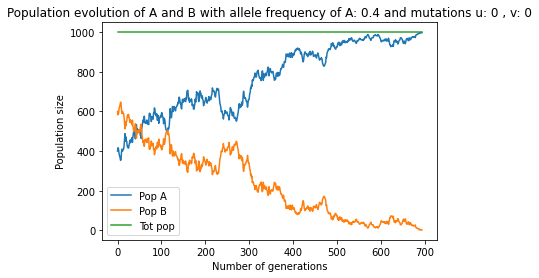

In [360]:
trial.plot_all_pop()

In [361]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.6 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

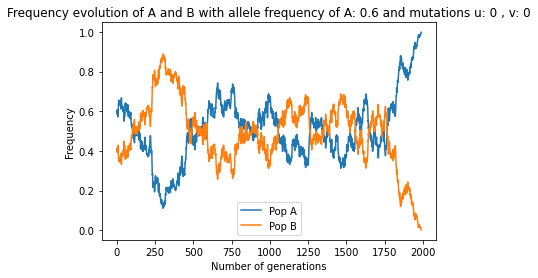

In [362]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
trial.pop_evolution_stable(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
trial.plot_all_freq()

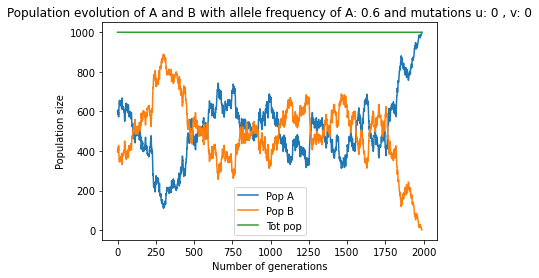

In [363]:
trial.plot_all_pop()

In [364]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.8 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

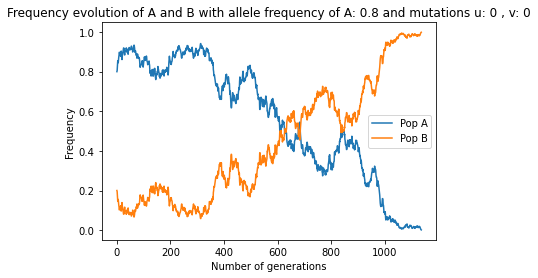

In [365]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
trial.pop_evolution_stable(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
trial.plot_all_freq()

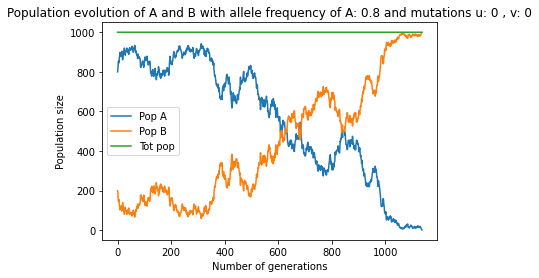

In [366]:
trial.plot_all_pop()

<h2>Dynamique 

In [367]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.2 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

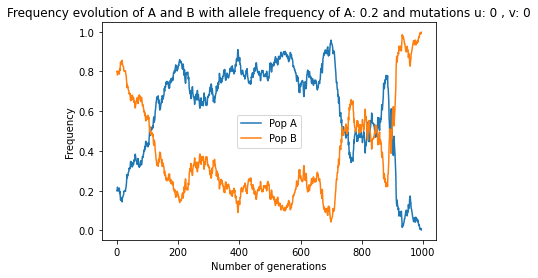

In [368]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
trial.pop_evolution_dynamic(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
trial.plot_all_freq()

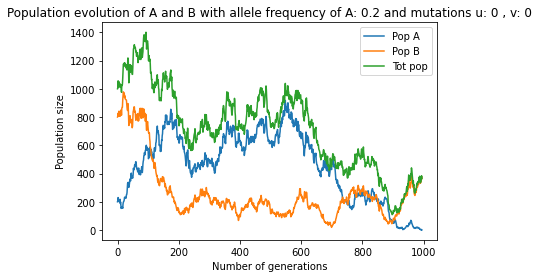

In [369]:
trial.plot_all_pop()

In [370]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.4 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

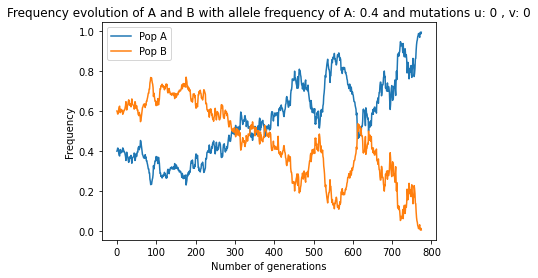

In [371]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
trial.pop_evolution_dynamic(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
trial.plot_all_freq()

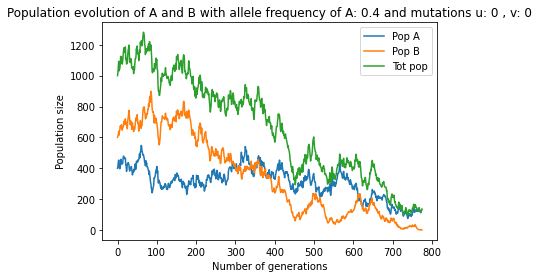

In [372]:
trial.plot_all_pop()

In [374]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.6 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

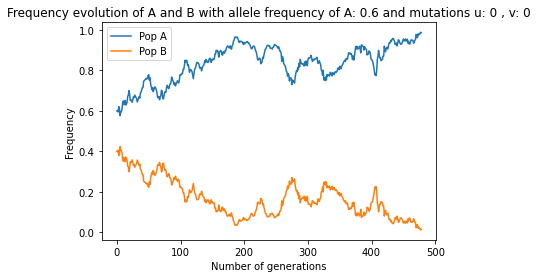

In [375]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
trial.pop_evolution_dynamic(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
trial.plot_all_freq()

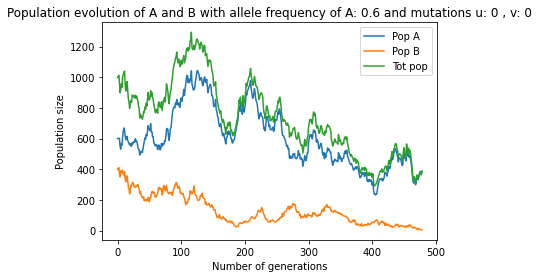

In [376]:
trial.plot_all_pop()

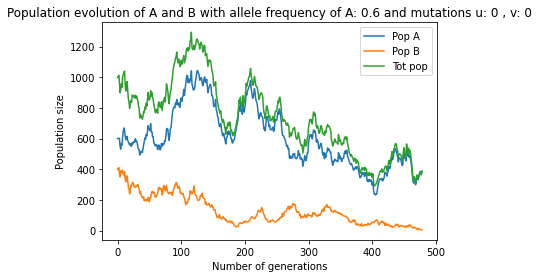

In [377]:
N = 1000 #starting population

u = 0 # Mutation of A into B
v = 0 # Mutation of B into A
trial.plot_all_pop()
Freq_A = 0.8 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

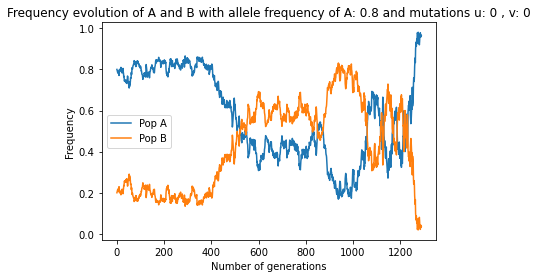

In [378]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations)
trial.pop_evolution_dynamic(trial.Pop_size, trial.P_A, trial.P_B, trial.generation)
trial.plot_all_freq()

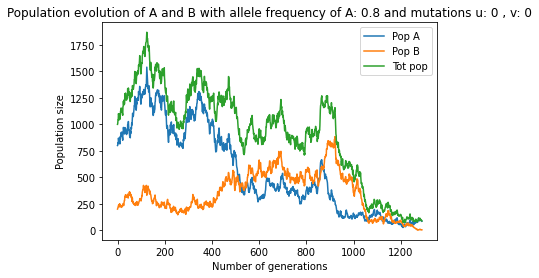

In [379]:
trial.plot_all_pop()

<h2>Stable avec mutations

In [380]:
N = 1000 #starting population

u = 0.2 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

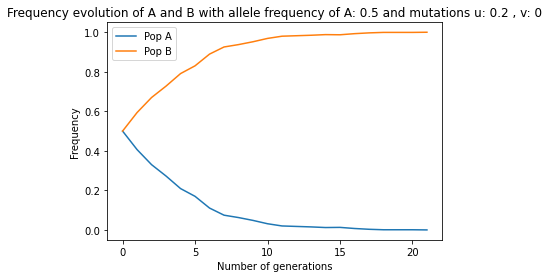

In [381]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations, u, v)
trial.pop_evolution_stable_mutation(trial.Pop_size, trial.P_A, trial.P_B, trial.u, trial.v, trial.generation)
trial.plot_all_freq()

In [382]:
N = 1000 #starting population

u = 0.4 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

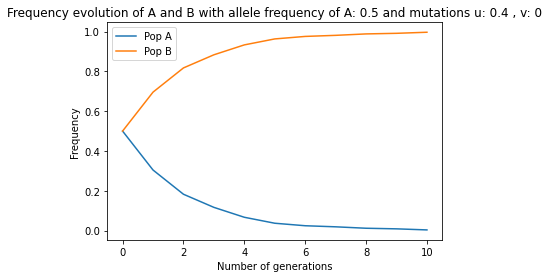

In [383]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations, u, v)
trial.pop_evolution_stable_mutation(trial.Pop_size, trial.P_A, trial.P_B, trial.u, trial.v, trial.generation)
trial.plot_all_freq()

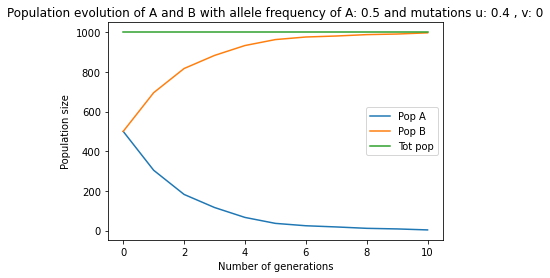

In [384]:
trial.plot_all_pop()

In [385]:
N = 1000 #starting population

u = 0.6 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop Ntrial.plot_all_pop()

n_generations = 2000

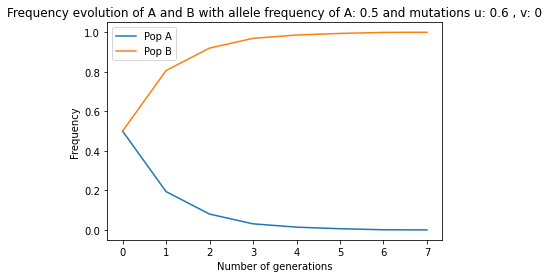

In [386]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations, u, v)
trial.pop_evolution_stable_mutation(trial.Pop_size, trial.P_A, trial.P_B, trial.u, trial.v, trial.generation)
trial.plot_all_freq()

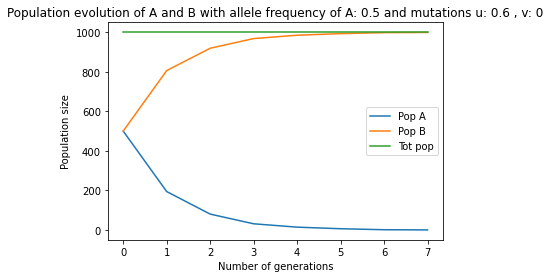

In [387]:
trial.plot_all_pop()

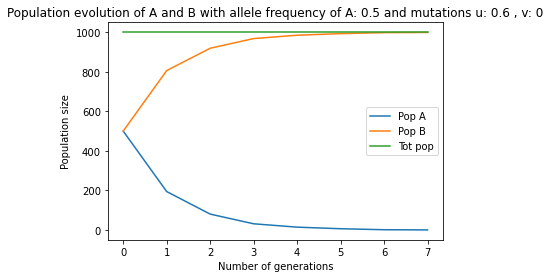

In [388]:
N = 1000 #starting population

u = 0.8 # Mutation of A into B
v = 0 # Mutation of B into A
trial.plot_all_pop()
Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

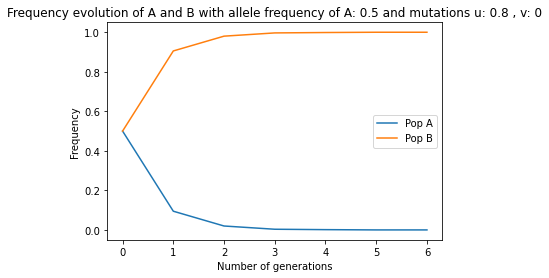

In [389]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations, u, v)
trial.pop_evolution_stable_mutation(trial.Pop_size, trial.P_A, trial.P_B, trial.u, trial.v, trial.generation)
trial.plot_all_freq()

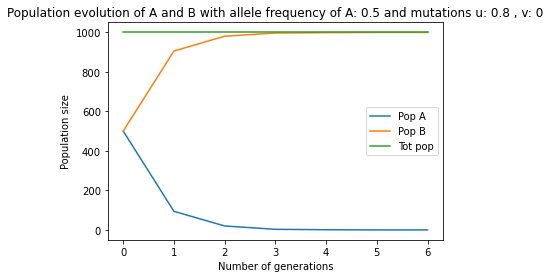

In [390]:
trial.plot_all_pop()

<h2>Dynamique avec mutations 

In [391]:
N = 1000 #starting population

u = 0.2 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Ftrial.plot_all_pop()requency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

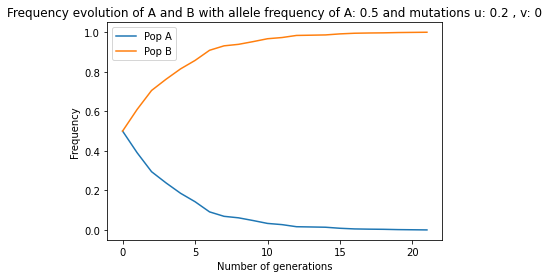

In [392]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations, u, v)
trial.pop_evolution_dynamic_mutation(trial.Pop_size, trial.P_A, trial.P_B, trial.u, trial.v, trial.generation)
trial.plot_all_freq()

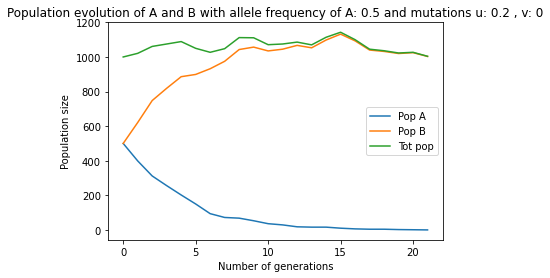

In [393]:
trial.plot_all_pop()

In [399]:
N = 1000 #starting population

u = 0.4 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

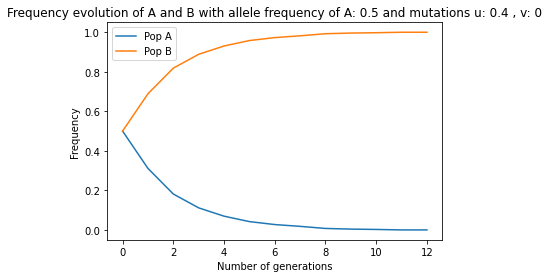

In [400]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations, u, v)
trial.pop_evolution_dynamic_mutation(trial.Pop_size, trial.P_A, trial.P_B, trial.u, trial.v, trial.generation)
trial.plot_all_freq()

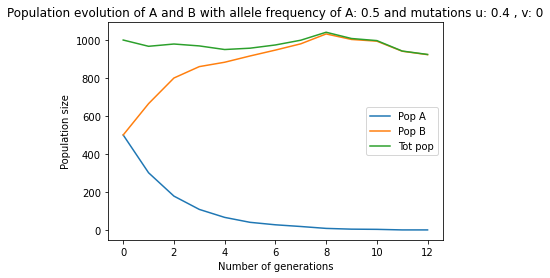

In [401]:
trial.plot_all_pop()

In [402]:
N = 1000 #starting population

u = 0.6 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Frequency of allele B in pop N

n_generations = 2000

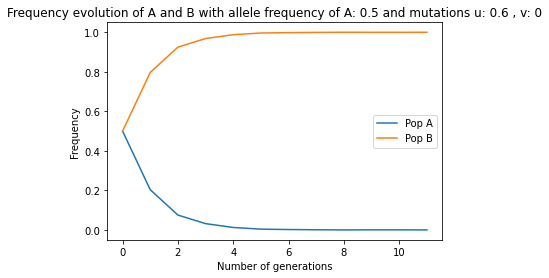

In [403]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations, u, v)
trial.pop_evolution_dynamic_mutation(trial.Pop_size, trial.P_A, trial.P_B, trial.u, trial.v, trial.generation)
trial.plot_all_freq()

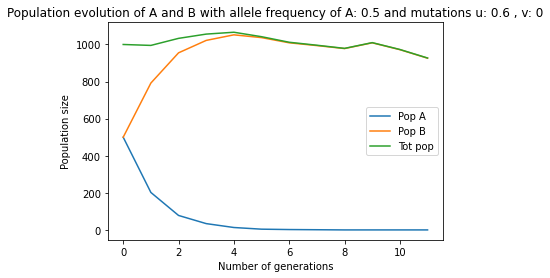

In [404]:
trial.plot_all_pop()

In [405]:
N = 1000 #starting population

u = 0.8 # Mutation of A into B
v = 0 # Mutation of B into A

Freq_A = 0.5 #Frequency of allele A in pop N
Freq_B = 1 - Freq_A #Freqtrial.plot_all_pop()uency of allele B in pop N

n_generations = 2000

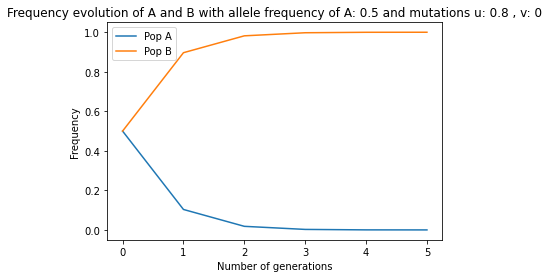

In [406]:
trial = Wright_Fisher(N, Freq_A, Freq_B, n_generations, u, v)
trial.pop_evolution_dynamic_mutation(trial.Pop_size, trial.P_A, trial.P_B, trial.u, trial.v, trial.generation)
trial.plot_all_freq()

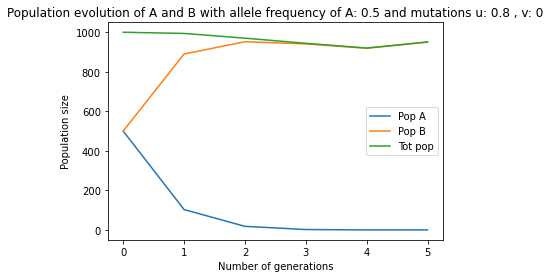

In [407]:
trial.plot_all_pop()